In [1]:
using RCall
figsize(;width,height) =
    RCall.ijulia_setdevice(MIME("image/svg+xml"), width=width, height=height)
R"
require(tidyverse)
"

┌ Warning: RCall.jl: Loading required package: tidyverse
│ ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
│ ✔ ggplot2 3.4.0     ✔ purrr   1.0.1
│ ✔ tibble  3.1.8     ✔ dplyr   1.1.0
│ ✔ tidyr   1.3.0     ✔ stringr 1.5.0
│ ✔ readr   2.1.3     ✔ forcats 1.0.0
│ ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
│ ✖ dplyr::filter() masks stats::filter()
│ ✖ dplyr::lag()    masks stats::lag()
└ @ RCall ~/.julia/packages/RCall/Wyd74/src/io.jl:172


RObject{LglSxp}
[1] TRUE


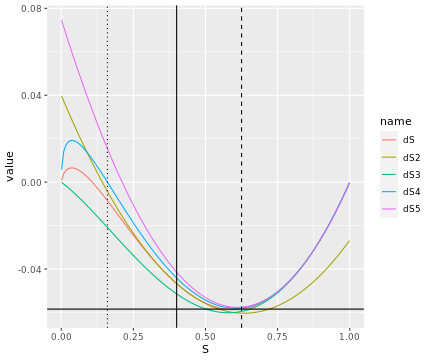

RObject{VecSxp}


In [2]:
R"
a = 1/5
r = .5
HIT = 1-a/r
data.frame(S = seq(1e-3,1-1e-3, length.out=128)) %>%
    mutate(
        dS = (-r*S) + r*S^2 + (-a*S*log(S)),
        dS2 = - a/r*(a*log(a/r)-a+r) + (S-a/r)*(a*(-log(a/r))+a-r) + r/2*(S-a/r)^2,
        dS3 = (-r*S) + r*S^2 + (-2*a*S/(S+1)*(S-1)),
        dS4 = (-r*S) + r*S^2 + (-a*sqrt(S)*(S-1)),
        dS5 = (-r*S) + r*S^2 + (-a*(1+(S-1)/2-(S-1)^2/8)*(S-1)),
    ) %>%
    pivot_longer(-S) %>%
ggplot() +
    geom_line(aes(S, value, col=name)) +
    geom_vline(aes(xintercept=a/r)) +
    geom_vline(aes(xintercept=(a/r)^2), linetype='dotted') +
    geom_vline(aes(xintercept=1/(2-a/r)), linetype='dashed') +
    geom_hline(aes(yintercept=-r*HIT/(1+HIT)^2 + a/(1+HIT)*log(1+HIT)))
"

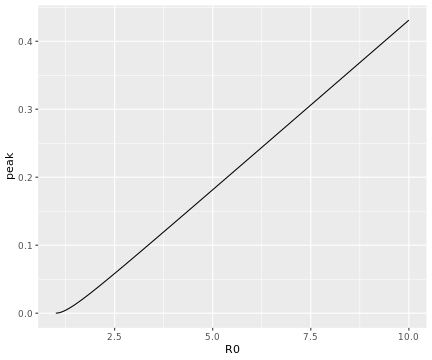

RObject{VecSxp}


In [3]:
R"
data.frame(R0 = seq(1, 10, length.out=128)) %>%
    mutate(
        a=1/5,
        r=R0*a,
        HIT=1-1/R0,
        peak=(r*HIT-a*(1+HIT)*log(1+HIT))/(1+HIT)^2,
    ) %>%
ggplot() +
    geom_line(aes(R0, peak))
"

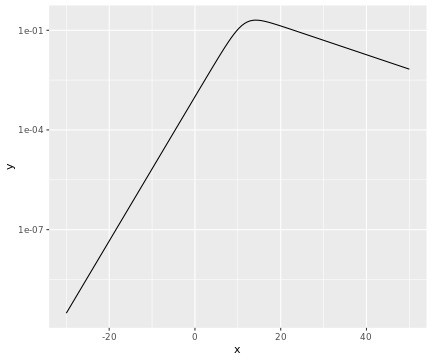

RObject{VecSxp}


In [4]:
R"
x = seq(-30,50, length.out=128)
data.frame(x) %>%
    mutate(y = 1 / (1000*exp(-x/2)+exp(x/10))) %>%
ggplot() +
    geom_line(aes(x,y)) +
    scale_y_log10()
"

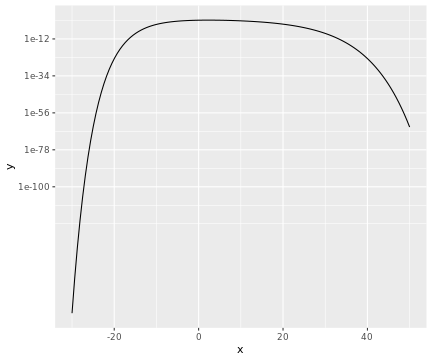

RObject{VecSxp}


In [5]:
R"
x = seq(-30,50, length.out=128)
data.frame(x) %>%
    mutate(y = exp(-exp(-x/5) - exp(x/10))) %>%
ggplot() +
    geom_line(aes(x,y)) +
    scale_y_log10()
"